### **Bibliotecas fundamentais**

In [ ]:
## importanto bibliotecas

import pandas as pd ## naming the library as pd
import plotnine as p9
import statsmodels.formula.api as smf ## modelo de regressão

In [ ]:
## importanto os dados

dados_brutos_ipca = pd.read_json("https://apisidra.ibge.gov.br/values/t/1737/n1/all/v/2265,2266/p/all/d/v2265%202,v2266%2013?formato=json")
dados_brutos_ipca


,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Mês (Código),Mês
1,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,197912,dezembro 1979
2,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198001,janeiro 1980
3,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198002,fevereiro 1980
4,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198003,março 1980
...,...,...,...,...,...,...,...,...,...,...,...
1098,1,Brasil,30,Número-índice,7312.9700000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,202506,junho 2025
1099,1,Brasil,30,Número-índice,7331.9800000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,202507,julho 2025
1100,1,Brasil,30,Número-índice,7323.9100000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,202508,agosto 2025
1101,1,Brasil,30,Número-índice,7359.0600000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,202509,setembro 2025


In [ ]:
## chechando os tipos de variável

dados_brutos_ipca['D2C'].unique()

array(['Variável (Código)', '2265', '2266'], dtype=object)

In [ ]:
## checando o tipo de variável

dados_brutos_ipca['D2N'].unique()

array(['Variável', 'IPCA - Variação acumulada em 12 meses',
       'IPCA - Número-índice (base: dezembro de 1993 = 100)'],
      dtype=object)

In [ ]:
## Aplicando tratamentos (primeira etapa do ciclo da analise de dados)

## Checando tipo de dado

(
    dados_brutos_ipca
    .info()
)

## os dados estão classificados como "objetos", precisa mudar.

## fazendo a limpeza necessária e coletando os dados que eu preciso

dados_tratados_ipca = (
    dados_brutos_ipca
    .rename(columns = {"V": "ipca", "D3C": "data", "D2C": "codigo", "D2N": "variavel"}) # renomeando colunas
    .query("ipca not in ['valor', '...']") # removendo valores nulos na coluna de IPCA
    .loc[lambda x: x['data'] != "Mês (Código)"] # removendo onde há texto
    .assign(
        data=lambda x: pd.to_datetime(x['data'], format="%Y%m"), # reestrutarando o formato de data
        ipca = lambda x: x.ipca.astype(float), # mudando o tipo de dado pra float
        )
    .filter(["data", "ipca", "codigo", "variavel"]) # filtrando colunas
    .query("codigo == '2265'") ## filtrando para a variavel de interesse
    .query("data >= @pd.to_datetime('2000-01-01')") ## escolhendo data de interesse
)

dados_tratados_ipca



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NC      1103 non-null   object
 1   NN      1103 non-null   object
 2   MC      1103 non-null   object
 3   MN      1103 non-null   object
 4   V       1103 non-null   object
 5   D1C     1103 non-null   object
 6   D1N     1103 non-null   object
 7   D2C     1103 non-null   object
 8   D2N     1103 non-null   object
 9   D3C     1103 non-null   object
 10  D3N     1103 non-null   object
dtypes: object(11)
memory usage: 94.9+ KB


,data,ipca,codigo,variavel
242,2000-01-01,8.85,2265,IPCA - Variação acumulada em 12 meses
243,2000-02-01,7.86,2265,IPCA - Variação acumulada em 12 meses
244,2000-03-01,6.92,2265,IPCA - Variação acumulada em 12 meses
245,2000-04-01,6.77,2265,IPCA - Variação acumulada em 12 meses
246,2000-05-01,6.47,2265,IPCA - Variação acumulada em 12 meses
...,...,...,...,...
547,2025-06-01,5.35,2265,IPCA - Variação acumulada em 12 meses
548,2025-07-01,5.23,2265,IPCA - Variação acumulada em 12 meses
549,2025-08-01,5.13,2265,IPCA - Variação acumulada em 12 meses
550,2025-09-01,5.17,2265,IPCA - Variação acumulada em 12 meses


## ANÁLISE DE DADOS

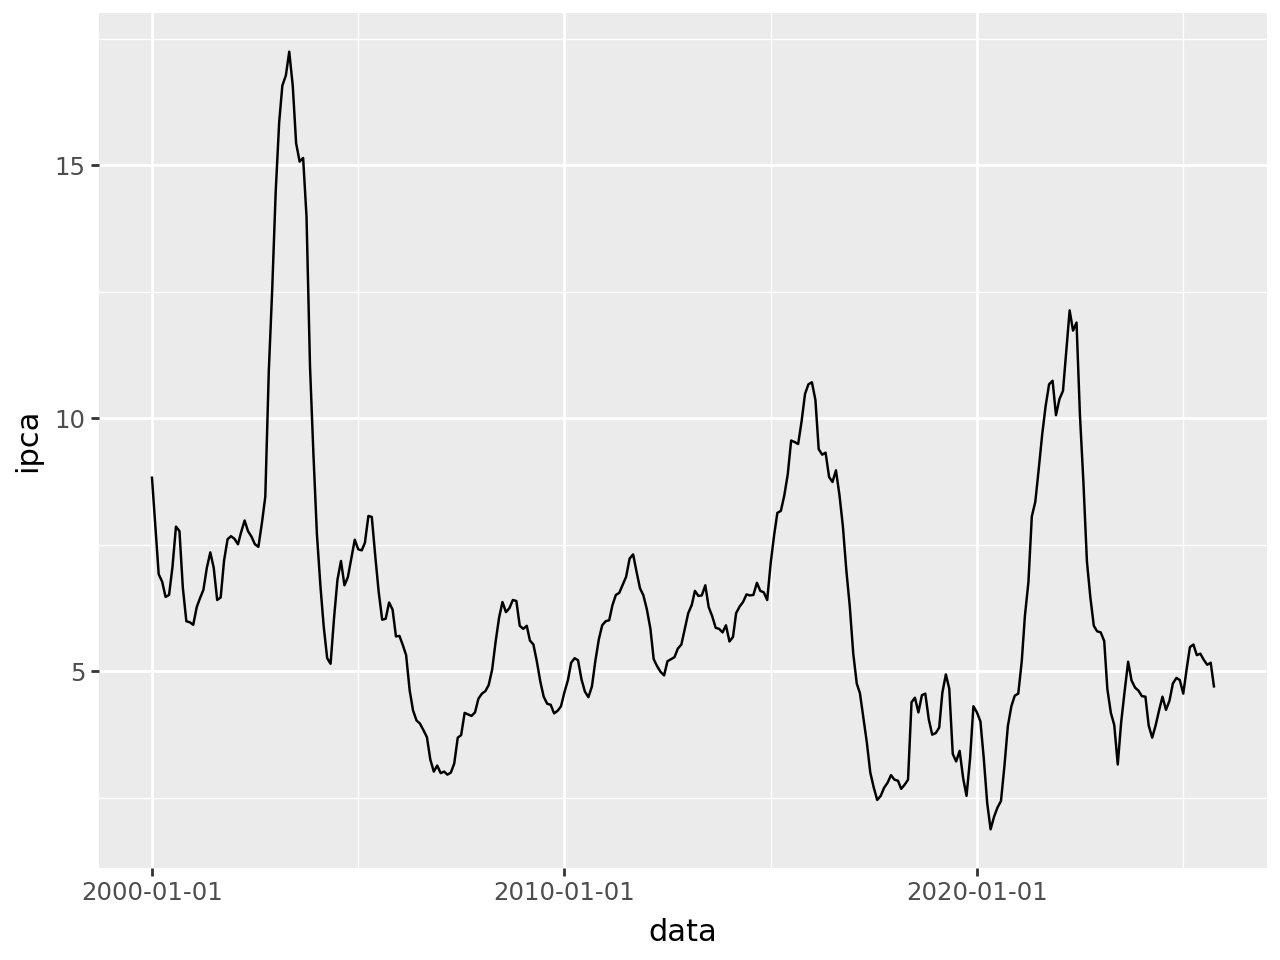

In [ ]:
## Como a inflação se comportou no Brasil?

(
    p9.ggplot(dados_tratados_ipca) +
    p9.aes(x = "data", y = "ipca") +
    p9.geom_line()
)



In [ ]:
## Qual o período com menores e maiores taxas de inflação?

dados_tratados_ipca.sort_values("ipca")

## organizando os valores do menor para o maior valor acumulado do IPCA.

,data,ipca,codigo,variavel
486,2020-05-01,1.88,2265,IPCA - Variação acumulada em 12 meses
487,2020-06-01,2.13,2265,IPCA - Variação acumulada em 12 meses
488,2020-07-01,2.31,2265,IPCA - Variação acumulada em 12 meses
485,2020-04-01,2.40,2265,IPCA - Variação acumulada em 12 meses
489,2020-08-01,2.44,2265,IPCA - Variação acumulada em 12 meses
...,...,...,...,...
279,2003-02-01,15.85,2265,IPCA - Variação acumulada em 12 meses
280,2003-03-01,16.57,2265,IPCA - Variação acumulada em 12 meses
283,2003-06-01,16.57,2265,IPCA - Variação acumulada em 12 meses
281,2003-04-01,16.77,2265,IPCA - Variação acumulada em 12 meses


In [ ]:
## Podemos também fazer da seguinte força

print(dados_tratados_ipca.query("ipca == ipca.max()"))
print(dados_tratados_ipca.query("ipca == ipca.min()"))

## Maior inflação: 2003
## Menor inflação: 2020




          data   ipca codigo                               variavel
282 2003-05-01  17.24   2265  IPCA - Variação acumulada em 12 meses
          data  ipca codigo                               variavel
486 2020-05-01  1.88   2265  IPCA - Variação acumulada em 12 meses


In [ ]:
## Qual o valor médio da inflação do Brasil e como é a distribuição de seus valores?

dados_tratados_ipca.ipca.describe()

## Inflação média nesse período foi na casa de 6.24%


,ipca
count,310.000000
mean,6.245452
std,2.701597
min,1.880000
25%,4.502500
50%,5.875000
75%,7.237500
max,17.240000


/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


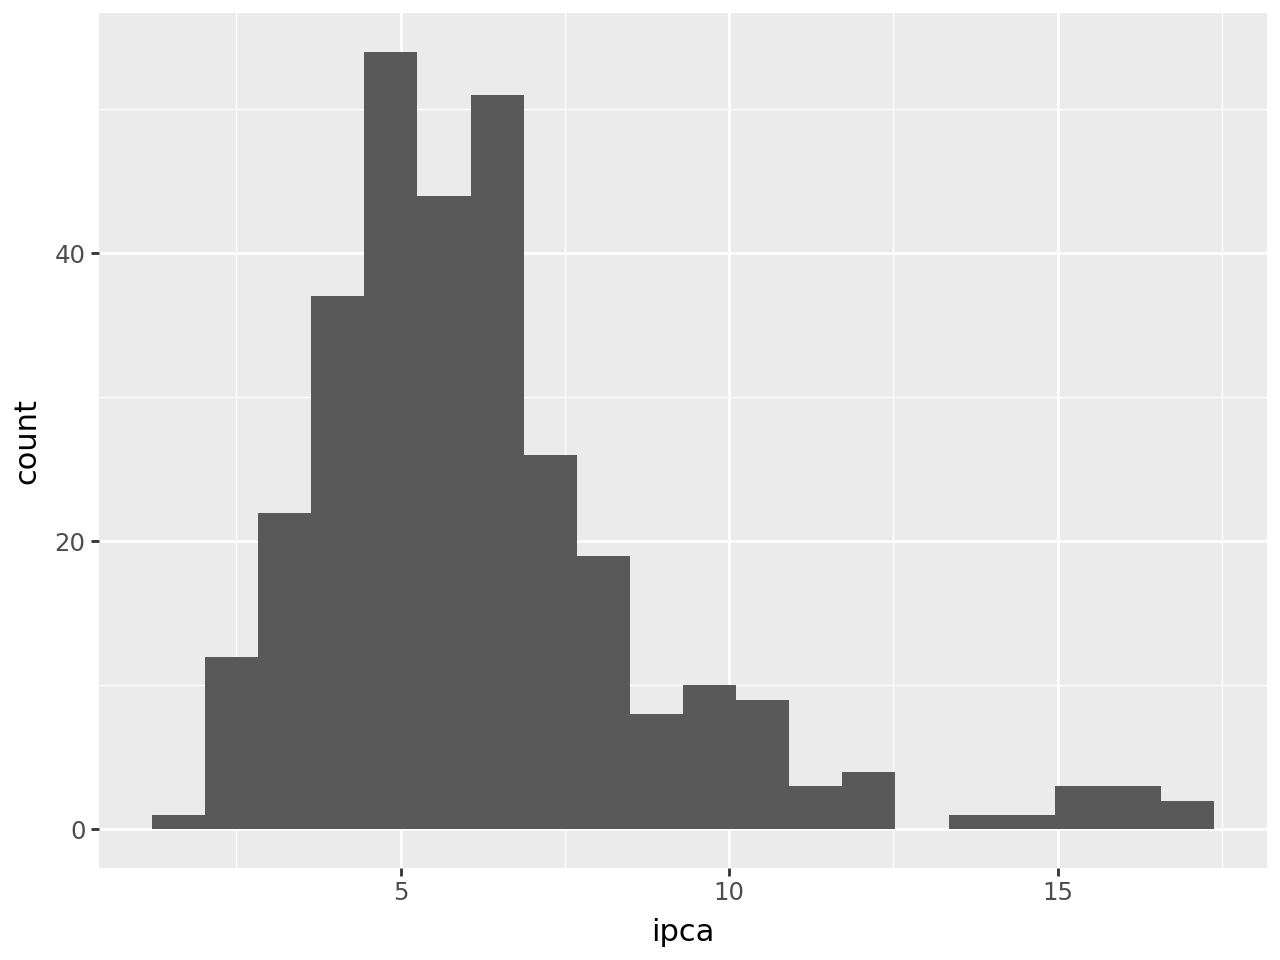

In [ ]:
## fazendo o gráfico de histograma

(
    p9.ggplot(dados_tratados_ipca) +
    p9.aes(x = "ipca") +
    p9.geom_histogram()

)

In [ ]:
## O que afeta a inflação? Com qual variável ela se relaciona?

## vamos analisar como a inflação se comporta em comparação com o desemprego.

dados_brutos_desemprego = pd.read_json("https://apisidra.ibge.gov.br/values/t/6381/n1/all/v/4099/p/all/d/v4099%201?formato=json")
dados_brutos_desemprego

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Trimestre Móvel (Código),Trimestre Móvel
1,1,Brasil,2,%,8.0,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201203,jan-fev-mar 2012
2,1,Brasil,2,%,7.8,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201204,fev-mar-abr 2012
3,1,Brasil,2,%,7.7,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201205,mar-abr-mai 2012
4,1,Brasil,2,%,7.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201206,abr-mai-jun 2012
...,...,...,...,...,...,...,...,...,...,...,...
160,1,Brasil,2,%,5.8,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202506,abr-mai-jun 2025
161,1,Brasil,2,%,5.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202507,mai-jun-jul 2025
162,1,Brasil,2,%,5.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202508,jun-jul-ago 2025
163,1,Brasil,2,%,5.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202509,jul-ago-set 2025


In [ ]:
## chechando os tipos de variável

dados_brutos_desemprego['D2N'].unique()

array(['Variável',
       'Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade'],
      dtype=object)

In [ ]:
## fazendo a limpeza necessária e coletando os dados que eu preciso

dados_tratados_desemprego = (
    dados_brutos_desemprego
    .rename(columns = {"V": "desemprego", "D3C": "data"}) # renomeando colunas
    .query("desemprego not in ['valor', '...']")
    .loc[lambda x: x['data'] != "Trimestre Móvel (Código)"] # removendo onde há texto
    .assign(
        data=lambda x: pd.to_datetime(x['data'], format="%Y%m"), # reestrutarando o formato de data
        desemprego = lambda x: x.desemprego.astype(float), # mudando o tipo de dado pra float
        )
    .filter(["data", "desemprego"]) # filtrando colunas
)

dados_tratados_desemprego

,data,desemprego
1,2012-03-01,8.0
2,2012-04-01,7.8
3,2012-05-01,7.7
4,2012-06-01,7.6
5,2012-07-01,7.5
...,...,...
160,2025-06-01,5.8
161,2025-07-01,5.6
162,2025-08-01,5.6
163,2025-09-01,5.6


In [ ]:
## Vamos cruzar as tabelas para fazer essa análise

dados_cruzados = (
dados_tratados_ipca
.set_index("data")
.join(other = dados_tratados_desemprego.set_index("data"), how = "inner")
.reset_index()
)
dados_cruzados

,data,ipca,codigo,variavel,desemprego
0,2012-03-01,5.24,2265,IPCA - Variação acumulada em 12 meses,8.0
1,2012-04-01,5.10,2265,IPCA - Variação acumulada em 12 meses,7.8
2,2012-05-01,4.99,2265,IPCA - Variação acumulada em 12 meses,7.7
3,2012-06-01,4.92,2265,IPCA - Variação acumulada em 12 meses,7.6
4,2012-07-01,5.20,2265,IPCA - Variação acumulada em 12 meses,7.5
...,...,...,...,...,...
159,2025-06-01,5.35,2265,IPCA - Variação acumulada em 12 meses,5.8
160,2025-07-01,5.23,2265,IPCA - Variação acumulada em 12 meses,5.6
161,2025-08-01,5.13,2265,IPCA - Variação acumulada em 12 meses,5.6
162,2025-09-01,5.17,2265,IPCA - Variação acumulada em 12 meses,5.6


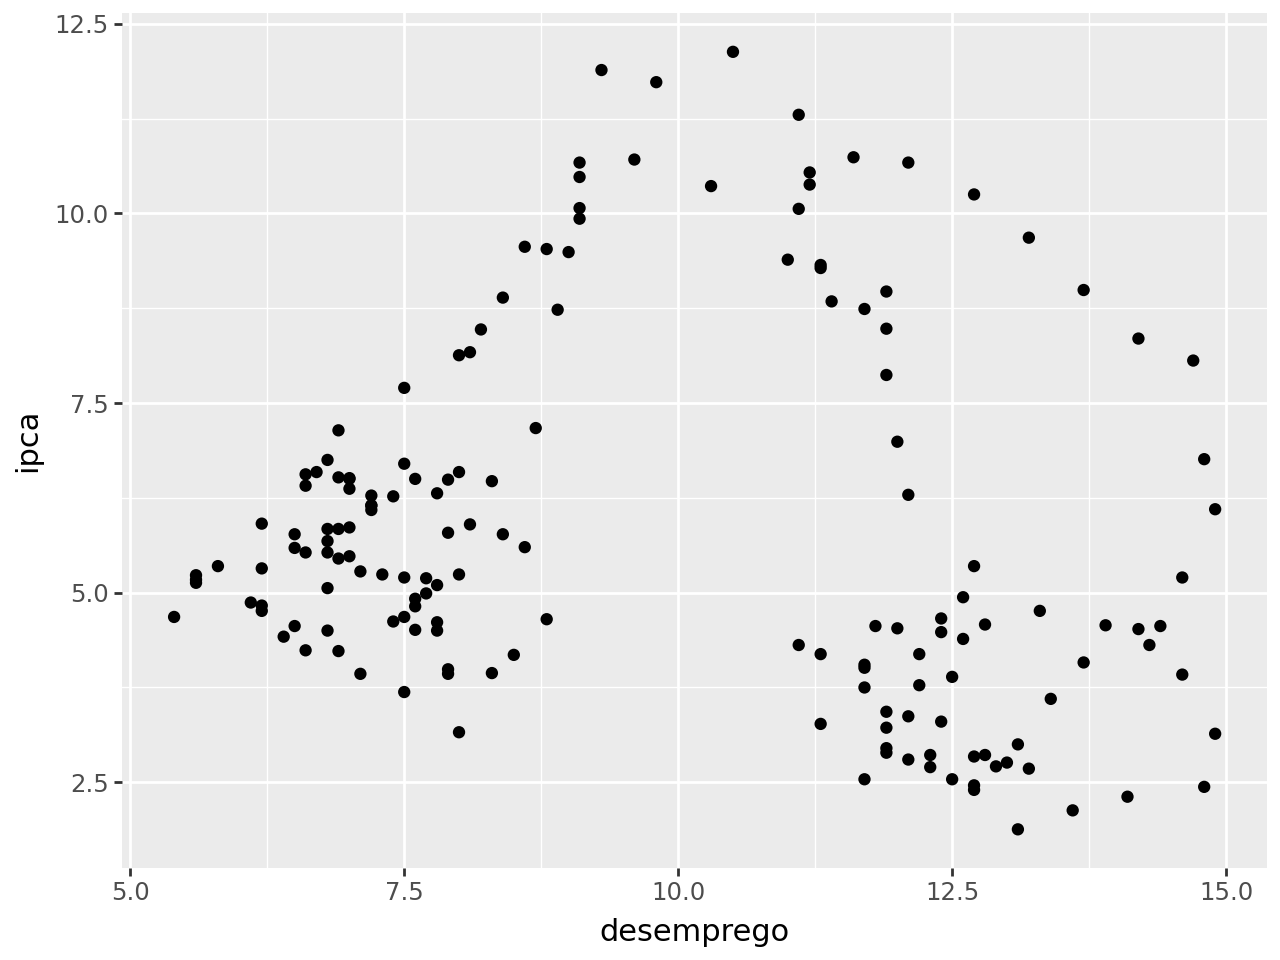

In [ ]:
## análise: curva de phillips

(
    p9.ggplot(dados_cruzados) +
    p9.aes(x = "desemprego", y = "ipca") +
    p9.geom_point()
)

## Inicialmente, não á nenhuma relação padrão entre as variáveis.
## A teoria afirma que períodos de alto desemprego preevem baixa inflação (atividade baixa) e períodos de baixo desempre, a inflação sobe (atividade alta).
## Relação negativamente correlacionada.

In [ ]:
## vamos modelar a relação

modelo = smf.ols("ipca ~ desemprego", data = dados_cruzados).fit()
modelo

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   ipca   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.781
Date:                Tue, 09 Dec 2025   Prob (F-statistic):             0.0973
Time:                        16:04:22   Log-Likelihood:                -375.61
No. Observations:                 164   AIC:                             755.2
Df Residuals:                     162   BIC:                             761.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9470      0.696      9.986      0.0

In [89]:
## adicionando o modelo de ajuste

g = (
    p9.ggplot(dados_cruzados)
    + p9.aes(x="desemprego", y="ipca")
    + p9.geom_point()
    + p9.geom_smooth(method="lm", color="lightcoral")  # linha vermelha clara
    + p9.labs(
        title="Inflation vs Unemployment (Brazil, 2012–2025)",
        x="Unemployment Rate",
        y="Inflation Rate"
    )
)
g.save("inflation_vs_unemployment.png", dpi=300)
from google.colab import files
files.download("inflation_vs_unemployment.png")

/usr/local/lib/python3.12/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.12/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: inflation_vs_unemployment.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>